# Analysis


In [65]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
from scipy.stats import linregress
import requests
import json
from citipy import citipy
import time

# set latitude and longitude ranges
lat = (-90, 90)
lng = (-180, 180)

# base_url

base_url = f"http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# query url 
query_url = f"{base_url}appid={api_key}&units={units}&q="

In [66]:
# create lists to store cities and coordinates
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.00, high=90.00, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.00, size=1500)

lat_lngs = zip(lats, lngs)

# use citipy to find nearest cities with coordinates 

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
    
print(len(cities))
    

588


In [67]:
# create counters and lists
city_names = []
latitudes = []
longitudes = []
country_name = []
wind_speed = []
cloudiness = []
humidity = []
temperature = []
date = []
index_counter = 0 
set_counter = 1

In [68]:
# Retrieve data for cities
for city in cities:
    try:
        
        # API Call
        response = requests.get(query_url + city).json()
        
        
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country_name.append(response['sys']['country'])
        date.append(response['dt'])
        
        
        if index_counter > 50:
            index_counter = 0
            set_counter += 1
            city_names.append(city)
        else:
            index_counter += 1
            city_names.append(city)
            print(f"Processing Record {index_counter} of Set {set_counter} | {city}")
    except (KeyError, IndexError):
        
        print("City not found. Skipping...")


Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | busselton
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of Set 1 | chokurdakh
Processing Record 5 of Set 1 | cherskiy
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | orocue
Processing Record 10 of Set 1 | zaritap
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | severo-kurilsk
Processing Record 13 of Set 1 | zaltan
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | hermanus
City not found. Skipping...
City not found. Skipping...
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | linares
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | cap malheureux
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | sain

Processing Record 32 of Set 4 | porto novo
Processing Record 33 of Set 4 | leningradskiy
Processing Record 34 of Set 4 | sibolga
Processing Record 35 of Set 4 | vytegra
Processing Record 36 of Set 4 | thompson
Processing Record 37 of Set 4 | portland
Processing Record 38 of Set 4 | lata
Processing Record 39 of Set 4 | talnakh
Processing Record 40 of Set 4 | strezhevoy
Processing Record 41 of Set 4 | bijie
Processing Record 42 of Set 4 | kapaa
Processing Record 43 of Set 4 | villefranche-de-rouergue
Processing Record 44 of Set 4 | ancud
Processing Record 45 of Set 4 | salym
City not found. Skipping...
Processing Record 46 of Set 4 | port-gentil
Processing Record 47 of Set 4 | provideniya
Processing Record 48 of Set 4 | zary
Processing Record 49 of Set 4 | palmer
Processing Record 50 of Set 4 | grindavik
Processing Record 51 of Set 4 | faanui
Processing Record 1 of Set 5 | gayny
Processing Record 2 of Set 5 | pandan
Processing Record 3 of Set 5 | linjiang
City not found. Skipping...
Proc

Processing Record 15 of Set 8 | la ronge
Processing Record 16 of Set 8 | cravo norte
Processing Record 17 of Set 8 | coihaique
Processing Record 18 of Set 8 | palmas
Processing Record 19 of Set 8 | san lazaro
City not found. Skipping...
Processing Record 20 of Set 8 | polunochnoye
Processing Record 21 of Set 8 | ust-nera
Processing Record 22 of Set 8 | livingstonia
Processing Record 23 of Set 8 | vitry-le-francois
Processing Record 24 of Set 8 | pong
Processing Record 25 of Set 8 | zhangye
Processing Record 26 of Set 8 | hobyo
City not found. Skipping...
Processing Record 27 of Set 8 | verkhnevilyuysk
City not found. Skipping...
Processing Record 28 of Set 8 | rock sound
Processing Record 29 of Set 8 | goundam
Processing Record 30 of Set 8 | melo
Processing Record 31 of Set 8 | khandbari
Processing Record 32 of Set 8 | ballina
Processing Record 33 of Set 8 | carmelo
Processing Record 34 of Set 8 | san cristobal
Processing Record 35 of Set 8 | amga
Processing Record 36 of Set 8 | inirid

In [69]:
weather_df = pd.DataFrame({"City": city_names, "Lat": latitudes, "Lng": longitudes,
                          "Country": country_name, "Wind": wind_speed, "Cloud": cloudiness,
                          "Humidity": humidity, "Max Temp.": temperature, "Date": date})
weather_df.head()

,City,Lat,Lng,Country,Wind,Cloud,Humidity,Max Temp.,Date
0,tasiilaq,65.61,-37.64,GL,2.86,96,80,33.80,1603072352
1,ushuaia,-54.80,-68.30,AR,10.29,75,69,39.20,1603072349
2,busselton,-33.65,115.33,AU,6.73,18,41,75.00,1603072348
3,chokurdakh,70.63,147.92,RU,5.53,95,98,19.63,1603072554
4,cherskiy,68.75,161.30,RU,7.11,92,93,23.68,1603072364


In [52]:
# output as csv
weather_df.to_csv("output_data/weather_data.csv")

In [70]:
# describe dataframe
weather_df.describe()

,Lat,Lng,Wind,Cloud,Humidity,Max Temp.,Date
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,5.320000e+02
mean,19.862876,21.974079,7.662500,53.930451,74.994361,59.087519,1.603073e+09
std,34.054914,92.613370,5.752371,40.208647,19.302185,20.259243,1.197649e+02
min,-54.800000,-179.170000,0.160000,0.000000,10.000000,7.290000,1.603072e+09
25%,-9.170000,-60.582500,3.430000,8.000000,66.000000,44.600000,1.603072e+09
50%,22.840000,27.245000,6.265000,68.500000,79.000000,62.995000,1.603073e+09
75%,50.022500,110.137500,10.290000,95.000000,89.000000,76.265000,1.603073e+09
max,78.220000,179.320000,54.130000,100.000000,100.000000,98.600000,1.603073e+09


In [71]:
weather_df["Humidity"].max()
# no outliers

100

In [74]:
# dropping humidity outliers by index 

quartiles = weather_df["Humidity"].quantile([.25, .5, .75])

lower_q = quartiles[.25]
upper_q = quartiles[.75]
iqr = upper_q - lower_q

upper_bound = upper_q + (1.5*iqr)
lower_bound = lower_q - (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



Values below 31.5 could be outliers.
Values above 123.5 could be outliers.


In [75]:
clean_city_data = pd.DataFrame(weather_df[weather_df.Humidity >= 32.5])
clean_city_data.count()

City         508
Lat          508
Lng          508
Country      508
Wind         508
Cloud        508
Humidity     508
Max Temp.    508
Date         508
dtype: int64

In [76]:
clean_city_data.to_csv("output_data/clean_city_data.csv")

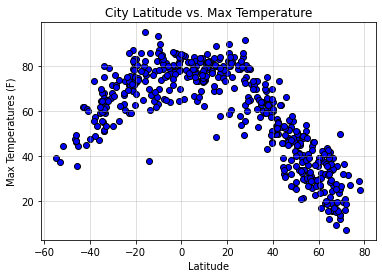

In [86]:
# Latitude vs. Max Temperature

plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp."], edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temperatures (F)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(alpha=0.5)
plt.savefig("Images/lat_temps.png")

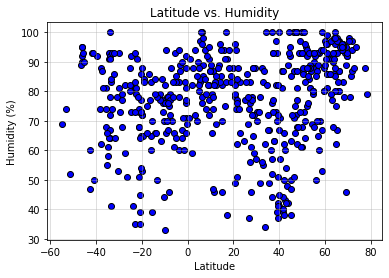

In [87]:
# Latitude vs. Humidity
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], edgecolors="black", facecolors= "blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")

plt.grid(alpha=0.5)
plt.savefig("Images/lat_humidity.png")

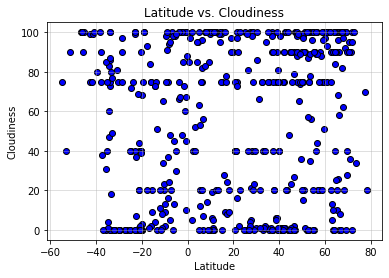

In [88]:
# Latitude vs Cloudiness

plt.scatter(clean_city_data["Lat"], clean_city_data["Cloud"], edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.grid(alpha=0.5)
plt.savefig("Images/Lat_Cloud.png")

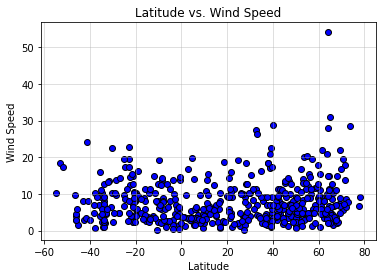

In [89]:
# Latitude vs. Wind Speed

plt.scatter(clean_city_data["Lat"], clean_city_data["Wind"], edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.grid(alpha=0.5)
plt.savefig("Images/Lat_Wind.png")

The rvalue is: -0.893179876221284


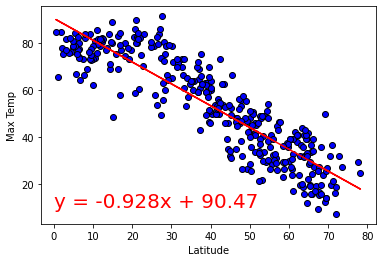

In [139]:
# Liner Regression - Max Temp vs. Latitude 
northern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] >= 0])
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp."]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(0,10), fontsize=20, color="red")
plt.savefig("Images/NH_Lat_temp_regress.png")
print(f"The rvalue is: {rvalue}")

The rvalue is: 0.7204510971678358


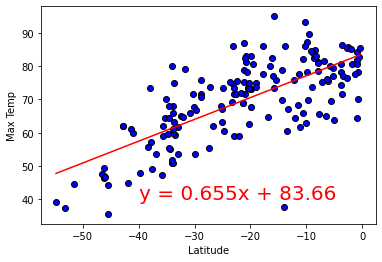

In [140]:
# Liner Regression - Max Temp vs. Latitude 
southern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] < 0])
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp."]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-40,40), fontsize=20, color="red")
plt.savefig("Images/SH_Lat_temp_regress.png")
print(f"The rvalue is: {rvalue}")

The rvalue is: 0.16680465609661294


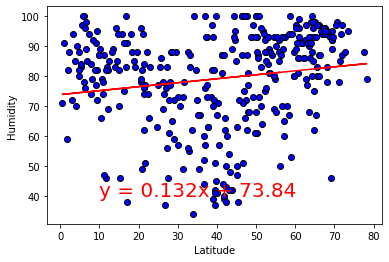

In [141]:
# Northern Hempisphere Latitude vs. Humidity 
northern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] >= 0])
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(10,40), fontsize=20, color="red")
plt.savefig("Images/NH_Lat_Humidity_regress.png")
print(f"The rvalue is: {rvalue}")

The rvalue is: -0.08321956475163324


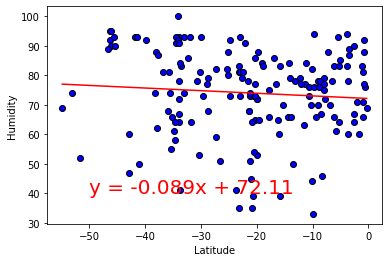

In [142]:
southern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] < 0])
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-50,40), fontsize=20, color="red")
plt.savefig("Images/SH_Lat_Humidity_regress.png")
print(f"The rvalue is: {rvalue}")

The rvalue is: 0.13225523613525142


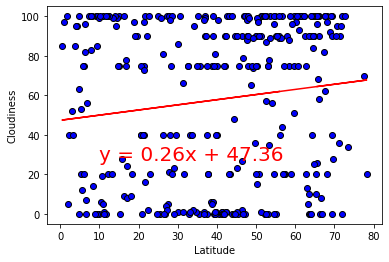

In [143]:
northern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] >= 0])
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloud"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(10,27), fontsize=20, color="red")
plt.savefig("Images/NH_Lat_cloud_regress.png")
print(f"The rvalue is: {rvalue}")

The rvalue is: -0.04879171455591977


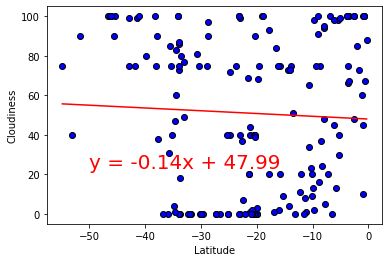

In [144]:
southern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] < 0])
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloud"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-50,23), fontsize=20, color="red")
plt.savefig("Images/SH_Lat_cloud_regress.png")
print(f"The rvalue is: {rvalue}")

The rvalue is: 0.19441225637773865


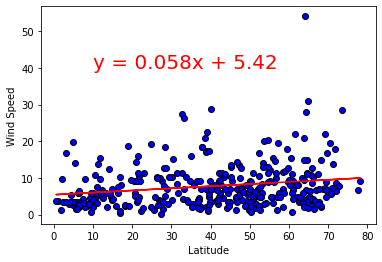

In [146]:
northern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] >= 0])
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(10,40), fontsize=20, color="red")
plt.savefig("Images/NH_Lat_wind_regress.png")
print(f"The rvalue is: {rvalue}")

The rvalue is: -0.11965985136586396


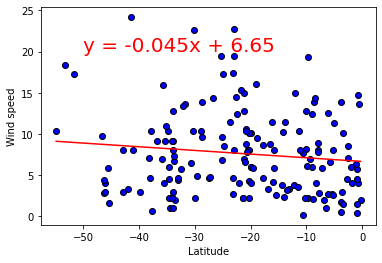

In [147]:
southern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] < 0])
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.annotate(line_eq,(-50,20), fontsize=20, color="red")
plt.savefig("Images/SH_Lat_wind_regress.png")
print(f"The rvalue is: {rvalue}")